#### create 1000 point ABCD method example 

In [1]:
#the below line of code is so that there is no need for scrolling through the plots

In [12]:
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;
#}

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.stats.stats import pearsonr

In [14]:
N = 1000 #number of total events
tests = 3 #number of N event tests (loops)
xs = .5 #separation of left and right regions
ys = .5 #separation of top and bottom regions

$$ N_{A}= \frac {N_{B}N_{C}}{N_{D}} $$

$$ N_{B} = \int_{}^{}\int_{}^{} f(x,y) dxdy \quad;\quad f(x,y)=f1(x)f2(y) $$

In [27]:
def ABCD(N,tests,xs,ys):
    NA = np.zeros(tests)
    A = np.zeros(tests)
    for i in range(tests):
        xvals = np.random.random_sample(N)
        yvals = np.random.random_sample(N)
            
        right = np.where(xvals>xs) 
        left = np.where(xvals<xs)

        A[i] = np.size(np.where(yvals[right]>ys))
        B = np.size(np.where(yvals[right]<ys))
        C = np.size(np.where(yvals[left]>ys))
        D = np.size(np.where(yvals[left]<ys))
        if D!=0:
            NA[i] = (B*C/D)
        else:
            NA[i] = 0
        if tests<4:
            print("Test " +str(i+1)+ ":")
            print("ABCD Method estimated events in A:" + str(NA[i]))
            print("Actual events in region A:" + str(A[i]))
            print("Actual events in region B:" + str(B))
            print("Actual events in region C:" + str(C))
            print("Actual events in region D:" + str(D) + "\n")
        
    #Visual of ABCD plot
    plt.figure(figsize=(8,6))
    plt.plot(xvals,yvals, ".")
    plt.title("Visual of ABCD events for final test values for "+str(N)+" events")
    plt.axvline(x=xs, color='r', linestyle='--')
    plt.axhline(y=ys, color='r', linestyle='--');
    plt.text(.7,.7, "A", color='r',fontsize=40)
    plt.text(.7,.2, "B", color='r',fontsize=40)
    plt.text(.2,.7, "C", color='r',fontsize=40)
    plt.text(.2,.2, "D", color='r',fontsize=40);
    plt.show()
    return NA, A, xvals, yvals


In [16]:
#what the results look like for 3 tests of 1000 events (uncomment below)

#NA, A = ABCD(N,tests,xs,ys)

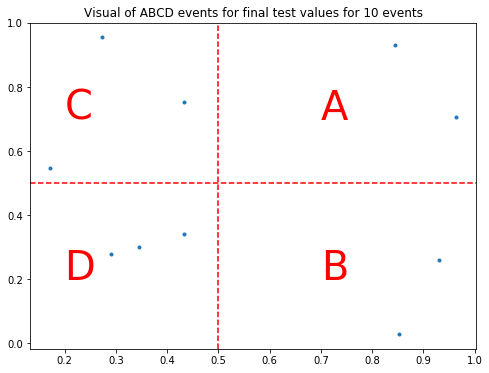

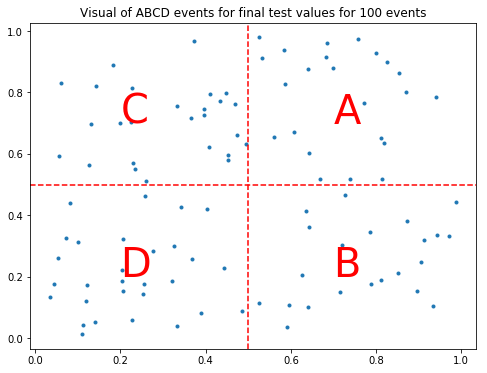

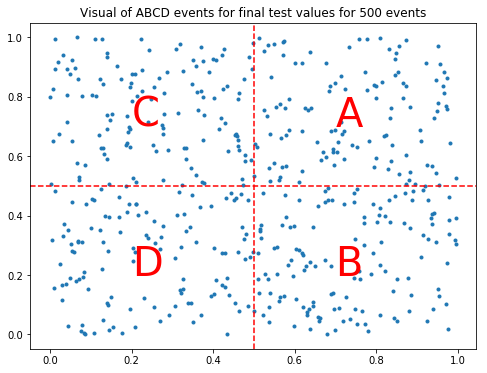

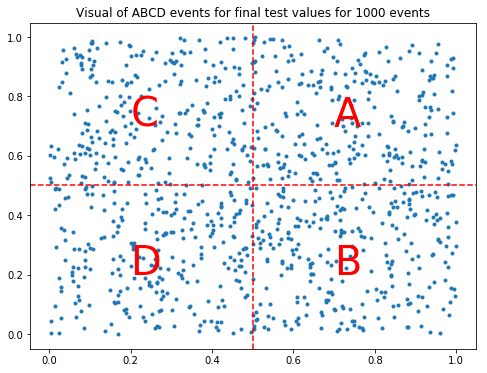

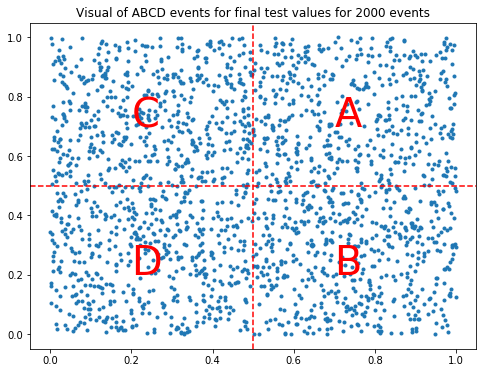

In [28]:
NA_10, A_10, x10, y10 = ABCD(10,1000,xs,ys)   
NA_100, A_100, x100, y100 = ABCD(100,1000,xs,ys)
NA_500, A_500, x500, y500 = ABCD(500,1000,xs,ys)
NA_1000, A_1000, x1000, y1000 = ABCD(1000,1000,xs,ys)
NA_2000, A_2000, x2000, y2000 = ABCD(2000,1000,xs,ys)

actual_A = [NA_10, NA_100, NA_500, NA_1000, NA_2000]
ABCD_A = [A_10, A_100, A_500, A_1000, A_2000]


In [29]:
difference = np.zeros(len(actual_A))
difference = np.subtract(actual_A, ABCD_A)
titles = ["NA (ABCD Method) vs A (Actual values) 10 events",
          "NA (ABCD Method) vs A (Actual values) 100 events",
         "NA (ABCD Method) vs A (Actual values) 500 events",
         "NA (ABCD Method) vs A (Actual values) 1000 events",
          "NA (ABCD Method) vs A (Actual values) 5000 events"
         ]


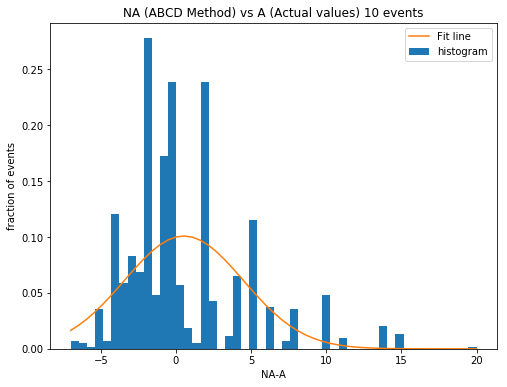

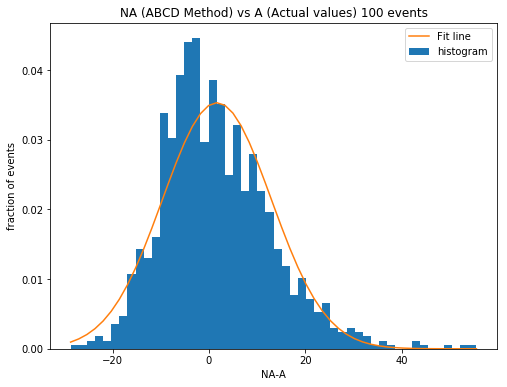

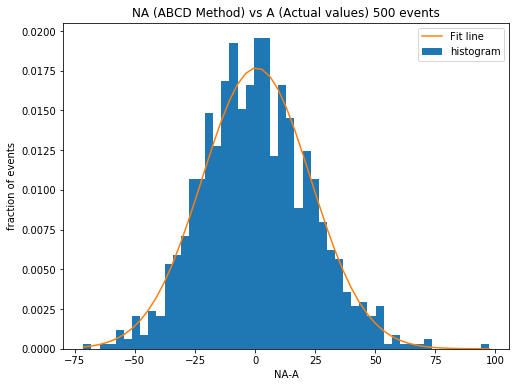

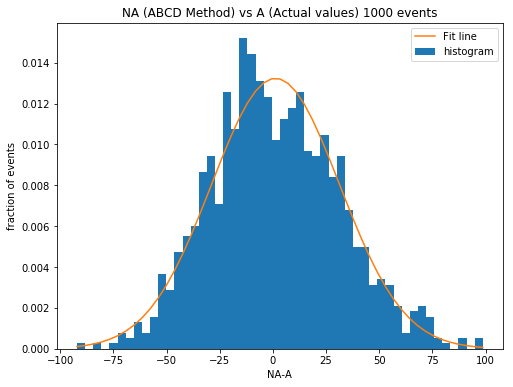

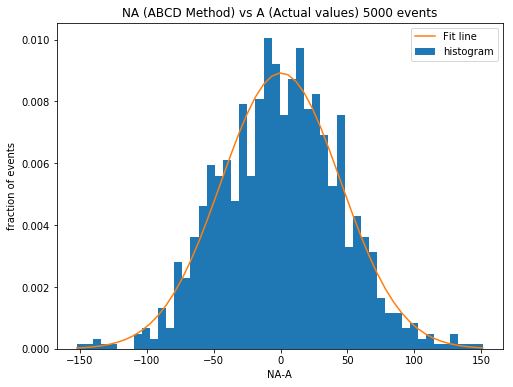

In [30]:
width = []
for i in range(len(actual_A)):
   
    plt.figure(figsize=(8,6))
    plt.title(titles[i]);
    plt.ylabel("fraction of events")
    plt.xlabel("NA-A");
    

    n, bins, patches = plt.hist(difference[i], normed=1, bins=50, label="histogram")
    b,sigma = norm.fit(difference[i])
    width.append(sigma)
    k = mlab.normpdf(bins,b,sigma)
    plt.plot(bins,k, label='Fit line');
    plt.legend()
    plt.show();


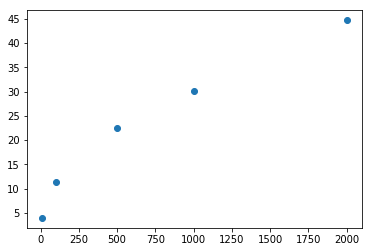

In [31]:
plt.scatter([10,100,500,1000,2000], width); #sigma/width vs [10,100,500,1000,2000]events plot 
plt.show();

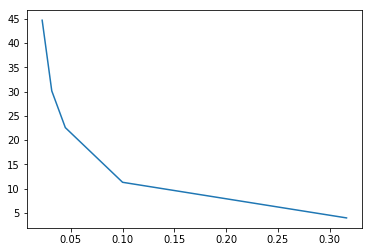

In [47]:
plt.plot(1/np.sqrt([10,100,500,1000,2000]), width);

In [85]:
avg10 = np.mean(A_10)
avg100 = np.mean(A_100)
avg500 = np.mean(A_500)
avg1000 = np.mean(A_1000)
avg2000 = np.mean(A_2000)

avg_A = [avg10, avg100, avg500, avg1000, avg2000]


From pearsonr? (the help menue): 
The Pearson correlation coefficient measures the linear relationship
between two datasets. Strictly speaking, Pearson's correlation requires
that each dataset be normally distributed, and not necessarily zero-mean.
Like other correlation coefficients, this one varies between -1 and +1
with 0 implying no correlation. Correlations of -1 or +1 imply an exact
linear relationship. Positive correlations imply that as x increases, so
does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets. The p-values are not entirely
reliable but are probably reasonable for datasets larger than 500 or so.


Number of events: correlation coeff

10 events: -0.08956626573714033
100 events: 0.15675529855509715
500 events: -0.019695164320358723
1000 events: -0.009028747498086458
2000

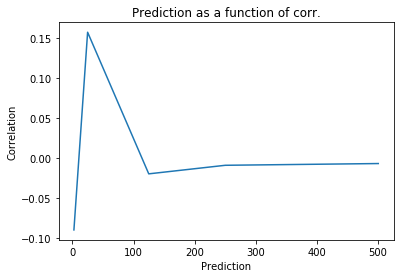

In [97]:
#calculate the corelation between two axis and look at the prediction as a function of corelation 
#point to point corelation
#pearsonr?
C10, p10 = pearsonr(x10,y10)
C100, p100 = pearsonr(x100,y100)
C500, p500 = pearsonr(x500,y500)
C1000, p1000 = pearsonr(x1000,y1000)
C2000, p2000 = pearsonr(x2000,y2000)

correlations = [C10, C100, C500, C1000, C2000]

print('''
From pearsonr? (the help menue): 
The Pearson correlation coefficient measures the linear relationship
between two datasets. Strictly speaking, Pearson's correlation requires
that each dataset be normally distributed, and not necessarily zero-mean.
Like other correlation coefficients, this one varies between -1 and +1
with 0 implying no correlation. Correlations of -1 or +1 imply an exact
linear relationship. Positive correlations imply that as x increases, so
does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets. The p-values are not entirely
reliable but are probably reasonable for datasets larger than 500 or so.

''')
print("Number of events: correlation coeff")
print("")
print("10 events: " + str(C10))
print("100 events: " + str(C100))
print("500 events: " + str(C500))
print("1000 events: " + str(C1000))
print("2000 events: " + str(C2000))

plt.plot(avg_A, correlations); 
plt.xlabel("Prediction")
plt.ylabel("Correlation")
plt.title("Prediction as a function of corr.");